# The Second Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. Separate reports (pdf, word, etc.) are _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook you are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution.*Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Yaping Chen 379645
    2. Haikun Huang 391180
    3. Yu He 391644

## Preprocessing of the Dataset (5 points)

The provided data set *air_pollution* contains hourly results of measuring the concentration of certain substances (CO, Benzene, NO2, particulate matter) and environmental conditions (temperature, relative humidity, traffic volume). This data was collected near a busy street in a city center by an automated device.

 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'air_pollution' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'air_pollution_2.csv' dataset and use that for the next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#your code
data_air = pd.read_csv("air_pollution.csv", delimiter=',')
df_air = pd.DataFrame(data_air).sample(frac=0.9, random_state=391180)
# df_air.to_csv("air_pollution_2.csv", index=False)

## Question 1 - Data Preprocessing and Data Quality (10 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'), but without the features *Traffic_Volume* and *Particulate_Matter*. Remove those columns before answering the questions.

In [3]:
#import libraries and data set
df_air = pd.read_csv("air_pollution_2.csv", delimiter=',')
df_air = df_air.drop(columns = ['Traffic_Volume','Particulate_Matter'])
print(df_air.shape)
df_air.head()

(8421, 7)


,Date,Time,CO,Benzene,NO2,Temperature,Humidity(%)
0,14.12.04,13:00:00,4.7,25.8,182,14.0,53.0
1,08.02.05,10:00:00,2.2,8.6,225,8.7,36.3
2,25.07.04,11:00:00,0.9,3.6,66,27.6,43.7
3,20.06.04,13:00:00,0.6,-200.0,36,-200.0,-200.0
4,29.11.04,0:00:00,3.0,10.3,113,10.2,78.4


(a) We want to get a first impression of the data. To achieve this, compute and show the following:
    - the column names (names of the features)
    - the data type of each feature
    - for time features: the minimum and maximum
    - for numerical (non-time) features: the mean, standard deviation, minimum and maximum
    - for categorical features: the number of classes and the value of the most frequent class

In [4]:
#your code
print("1.the column names")
print(df_air.columns)
print("**************************************")
print()\

print("2.the data type of each feature")
print(df_air.dtypes)
print("**************************************")
print()

print("3.categorical features")
col_categorical = ['Date', 'Time']
for col in col_categorical:
    print("Column Name = {}".format(col))
    print("the number of classes =",df_air[col].value_counts().shape[0])
    print("the value of the most frequent class")
    print(df_air[col].mode())
    print("---------------------------------------")
    print()
print("**************************************")
print()

print("4.numerical features")
col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']
for col in col_numerical:
    print("Column Name = {}".format(col))
    print("mean =",np.mean(df_air[col]))
    print("standard deviation =",np.std(df_air[col]))
    print("minimum =",np.min(df_air[col]))
    print("maximum =",np.max(df_air[col]))
    print("---------------------------------------")
    print()

1.the column names
Index(['Date', 'Time', 'CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)'], dtype='object')
**************************************

2.the data type of each feature
Date            object
Time            object
CO             float64
Benzene        float64
NO2              int64
Temperature    float64
Humidity(%)    float64
dtype: object
**************************************

3.categorical features
Column Name = Date
the number of classes = 391
the value of the most frequent class
0     01.04.05
1     01.07.04
2     04.08.04
3     05.06.04
4     05.12.04
5     06.11.04
6     08.01.05
7     09.02.05
8     10.01.05
9     13.05.04
10    13.06.04
11    17.07.04
12    18.03.05
13    18.05.04
14    19.04.04
15    19.11.04
16    21.12.04
17    23.01.05
18    23.03.05
19    23.07.04
20    24.03.04
21    24.05.04
22    24.11.04
23    25.08.04
24    26.10.04
25    28.03.04
26    28.11.04
27    30.08.04
28    31.03.05
29    31.10.04
dtype: object
-----------------------------

(b) Consider the features 'date' and 'time'. Combine them into a new column 'Datetime' using the datetime data type, and drop the old columns 'date' and 'time'. 

Which of the two representations of date and time do you think is more suitable for most analysis applications?

Explanation:<br> The "Datetime" is better than "Date" and "Time", because we can easy convert "Datetime" to other types of feature about time (such as datetime --> hour, datetime --> day, datetime --> month) to analyse application. "Datetime" can be easy to be index in dateset.

In [5]:
#your code
df_air['Datetime'] = pd.to_datetime(df_air.Date)+pd.to_timedelta(df_air.Time, unit='h')
df_air = df_air.drop(columns=['Date','Time'])
df_air.head()

,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
0,4.7,25.8,182,14.0,53.0,2004-12-14 13:00:00
1,2.2,8.6,225,8.7,36.3,2005-08-02 10:00:00
2,0.9,3.6,66,27.6,43.7,2004-07-25 11:00:00
3,0.6,-200.0,36,-200.0,-200.0,2004-06-20 13:00:00
4,3.0,10.3,113,10.2,78.4,2004-11-29 00:00:00


(c) For each feature corresponding to a measured value, provide a simple scatter plot showing the data points over time. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

*Hint: you may perform additional computations to verify your findings.*

/Users/hhk/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


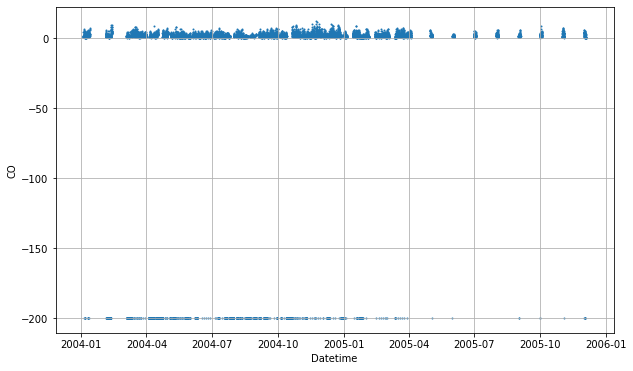

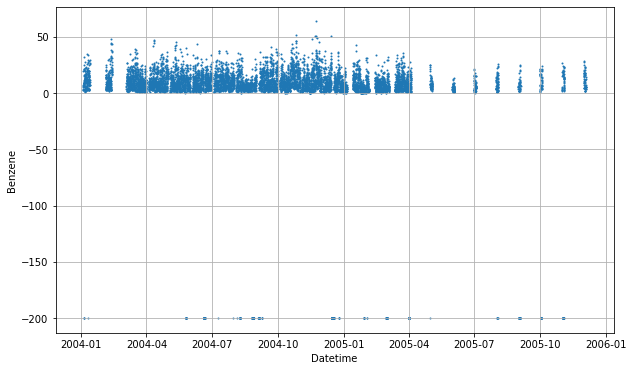

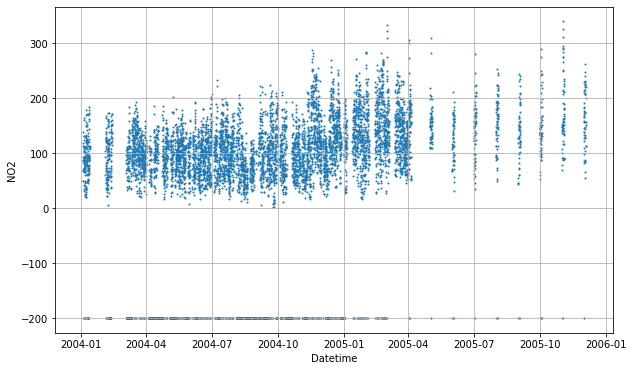

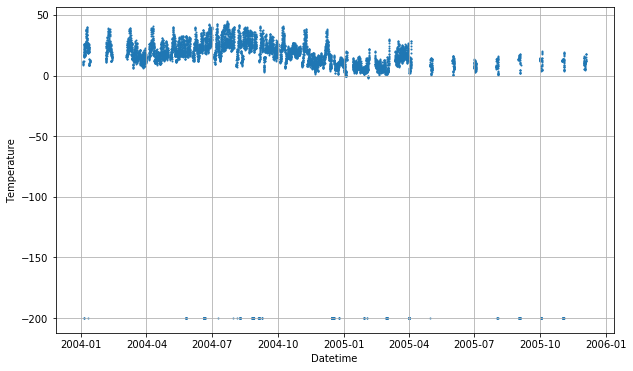

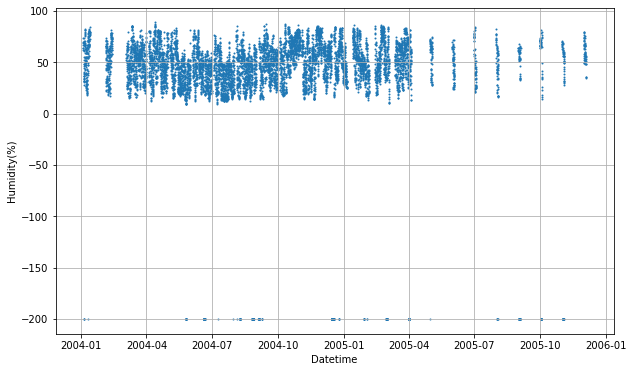

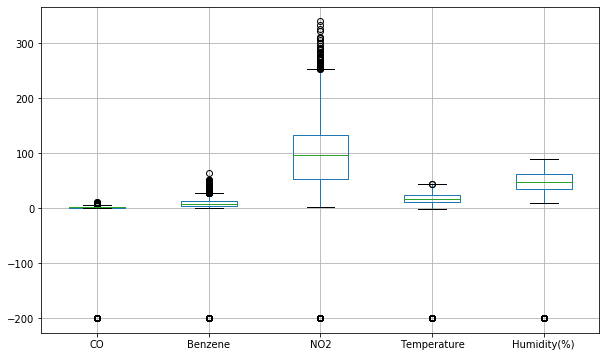

In [6]:
#your code

col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']

plt.figure(figsize=(10, 6))
plt.scatter(df_air['Datetime'],df_air['CO'], s=1.0)
plt.xlabel("Datetime")
plt.ylabel("CO")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_air['Datetime'],df_air['Benzene'], s=1.0)
plt.xlabel("Datetime")
plt.ylabel("Benzene")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_air['Datetime'],df_air['NO2'], s=1.0)
plt.xlabel("Datetime")
plt.ylabel("NO2")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_air['Datetime'],df_air['Temperature'], s=1.0)
plt.xlabel("Datetime")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_air['Datetime'],df_air['Humidity(%)'], s=1.0)
plt.xlabel("Datetime")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
df_air.boxplot(column=col_numerical)

Explanation: <br>
In each feature, they all have the same value -200 that is implausible data and clear to be outliers.

(d) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced, for example, deleting data rows that contain missing/implausible values or replacing them by a value derived from other data points. 

In this question, consider implausible values to be the ones identified in question (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Choose a strategy (or combination of strategies) to handle missing/implausible values. Create a cleaned data set with all those values handled accordingly.
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned data set. Also print the total number of data rows.
    
    4) Motivate and explain your strategy and describe its (dis-)advantages compared to other options. Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.

In [7]:
#your code

col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']

# before clean
print("###--- Before Cleaning ---###\n")
for col in col_numerical:
    print("Column Name = {}".format(col))
    print("mean =",np.mean(df_air[col]))
    print("standard deviation =",np.std(df_air[col]))
    print("minimum =",np.min(df_air[col]))
    print("maximum =",np.max(df_air[col]))
    print("---------------------------------------")
    print()

print("the total number of data rows =", df_air.shape[0])
print()

# clean strategy
print("###--- Cleaning Strategy ---###\n")
df_air_cleaned = df_air
# df_air_cleaned = df_air_cleaned[df_air_cleaned[]]
print("1. Checking null value in dataset\n")
print(df_air_cleaned.isnull().sum().sort_values(ascending=False))
print()

print("2. Deleting data rows that contain implausible values\n")
for col in col_numerical:
    df_air_cleaned = df_air_cleaned[df_air_cleaned[col] != -200]
    print("Column Name = '{}' and the number of residual rows = {}".format(col,df_air_cleaned.shape[0]))
    print()

    
# after clean
print("###--- After Cleaning ---###\n")
for col in col_numerical:
    print("Column Name = {}".format(col))
    print("mean =",np.mean(df_air_cleaned[col]))
    print("standard deviation =",np.std(df_air_cleaned[col]))
    print("minimum =",np.min(df_air_cleaned[col]))
    print("maximum =",np.max(df_air_cleaned[col]))
    print("---------------------------------------")
    print()

print("the total number of data rows =", df_air_cleaned.shape[0])

###--- Before Cleaning ---###

Column Name = CO
mean = -34.69576059850374
standard deviation = 78.05778465951362
minimum = -200.0
maximum = 11.9
---------------------------------------

Column Name = Benzene
mean = 1.706768792304952
standard deviation = 41.69531355924269
minimum = -200.0
maximum = 63.7
---------------------------------------

Column Name = NO2
mean = 57.571666072912954
standard deviation = 127.45881932367406
minimum = -200
maximum = 340
---------------------------------------

Column Name = Temperature
mean = 9.645398408740055
standard deviation = 43.537143848132196
minimum = -200.0
maximum = 44.6
---------------------------------------

Column Name = Humidity(%)
mean = 39.32929580809879
standard deviation = 51.57985891518149
minimum = -200.0
maximum = 88.7
---------------------------------------

the total number of data rows = 8421

###--- Cleaning Strategy ---###

1. Checking null value in dataset

Datetime       0
Humidity(%)    0
Temperature    0
NO2            0


Explanation: <br>
1. Strategy: Deleting data rows that contain implausible values.

2. Advantages: For replacing implausible values by a value derived from other data points, the replaced value may be incorrect and the dataset may be biased so that the dataset may be not reliable. Deleting data strategy can avoid this error.

3. Disadvantages: Decreassing the amount of sample and the important value may be deleted by deleting the row that it contains any implausible values.

4. Compare: the mean value, standard deviation and minimum of each feature are all changed, which is helpful for further calculating and the result of cleaned dataset is accurater.



## Question 2 - Data Preprocessing  and Advanced Visualization (15 points)

For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv').

(a) To create a suitable input for the following questions, modify the data set as listed below and then print the first 5 data rows:

    - Remove the columns 'Traffic_Volume' and 'Particulate_Matter'
    - Replace the columns 'Date' and 'Time' by a combined column 'Datetime' using the datetime data type
    - Restrict the data to the timeframe between 2004-04-01 and 2005-03-31
    - Drop all rows that contain a missing value or a value below -37
    
*Hint: You may be able to reuse some of your code or data sets created above.*

In [8]:
#your code
df_air = pd.read_csv("air_pollution_2.csv", delimiter=',')
df_air = df_air.drop(columns = ['Traffic_Volume','Particulate_Matter'])
df_air['Datetime'] = pd.to_datetime(df_air.Date)+pd.to_timedelta(df_air.Time, unit='h')
df_air = df_air.drop(columns=['Date','Time'])
df_air = df_air[(df_air['Datetime'] >= '2004-04-01') & (df_air['Datetime'] <= '2005-03-31')]
df_air = df_air.dropna(how='any',axis=0)
col_numerical = ['CO', 'Benzene', 'NO2', 'Temperature', 'Humidity(%)']
for col in col_numerical:
    df_air = df_air[df_air[col] >= -37]
df_air.head()

,CO,Benzene,NO2,Temperature,Humidity(%),Datetime
0,4.7,25.8,182,14.0,53.0,2004-12-14 13:00:00
2,0.9,3.6,66,27.6,43.7,2004-07-25 11:00:00
4,3.0,10.3,113,10.2,78.4,2004-11-29 00:00:00
6,2.0,11.3,208,32.6,31.8,2004-09-13 15:00:00
9,0.9,7.4,97,31.6,23.8,2004-07-18 10:00:00


(b) For temperature, humidity and CO compute the mean value for each month. Create two stream graphs based on this newly computed data, that visualize the change in temperature, CO and humidity over the months:

    1) For the first stream graph, simply use the mean values you computed for each month.
    
    2) For the second stream graph, first normalize the computed mean values by mapping them individually to an interval between 0 and 1, that is, apply Min-max normalization.

In [8]:
#your code

(c) Answer the following questions based on the stream graphs created in question 2(a) and briefly explain how you derived the answer. Which of the two stream graphs do you consider more adequate to obtain the answers?

    1) In which month is the average CO lowest?
    
    2) Is there any correlation between humidity and CO?
    
    3) Between which months is temperature increasing?

Explanation:

(d) We want to create a heat map that visualizes the CO measured for different combinations of humidity and temperature. 
The heatmap should have 12 columns and 12 rows. The shown CO value should be the *median* of all values for the combination of humidity and temperature.

Modify the data as needed. Use a binning strategy of your choice for converting numerical data to categorical data. Motivate and explain all your choices and modifications.

In [9]:
#your code

(e) Use the modified data to create a heat map as specified in question part (c). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) For which combination of humidity and temperature values is the median CO highest? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Is CO correlating with temperature, humidity, or both?

In [10]:
#your code

Explanation:

## Question 3 - Clustering (15 points): 

(a) For this question, use the extracted data set you created in the preprocessing step ('air_pollution_2.csv'). Use a scatter diagram to find the relation between the 'Traffic_Volume' and 'Particulate_Matter' columns.

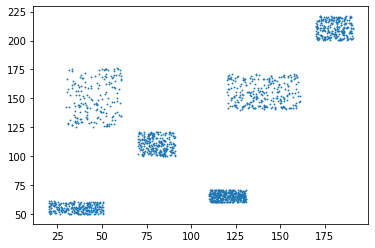

In [119]:
# Your code
df_air = pd.read_csv("air_pollution_2.csv", delimiter=',')
df_air_tp = pd.DataFrame(df_air, columns=["Traffic_Volume", "Particulate_Matter"])
# sns.jointplot(x="Traffic_Volume", y="Particulate_Matter", data=df_air_tp, kind="scatter");
plt.scatter(df_air_tp['Traffic_Volume'],df_air_tp['Particulate_Matter'], s=0.7)
plt.show()

(b) From the previous question you found the relationship between two columns which are suitable for applying clustering methods. Find the two arrays corresponding to these to columns and drop nan values from them. Apply the k_means method for clustering the two mentioned columns. Use three different number of clusters for classifying.

In [120]:
df_air_tp = df_air_tp.dropna()
x = df_air_tp.to_numpy()

K-Means: The number of clusters is 5


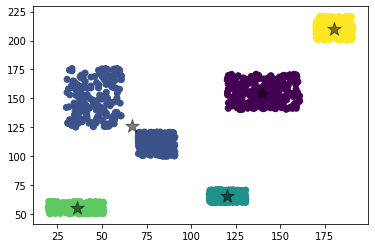

K-Means: The number of clusters is 6


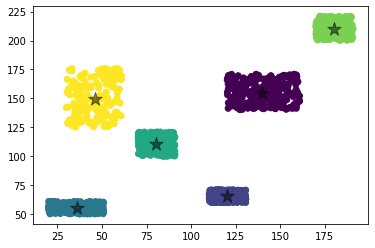

K-Means: The number of clusters is 7


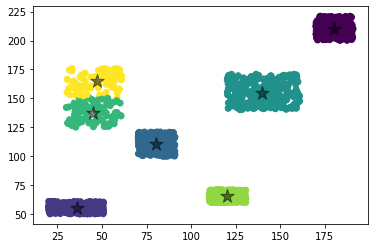

In [121]:
# Your code
# from sklearn import cluster
from sklearn.cluster import KMeans

def fun_KMeans(x,cluster_num):
    kmeans = KMeans(cluster_num).fit(x)
    Y = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    print("K-Means: The number of clusters is",cluster_num)
    plt.scatter(x[:, 0], x[:, 1], c=Y, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker = '*', s=200, alpha=0.5)
    plt.show()

for k in range(5,8):
    fun_KMeans(x,k)

(c) Apply the DBSCAN method for clustering the two mentioned columns. Use three different eps and min_samples for clustering.

DBSCAN: eps=4 , min_samples=20


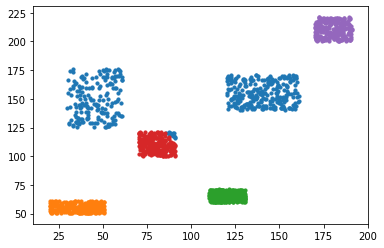

DBSCAN: eps=5 , min_samples=10


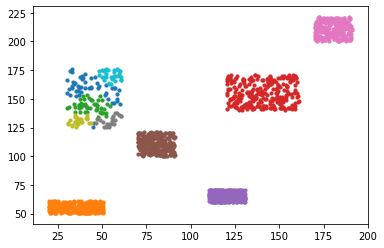

DBSCAN: eps=5 , min_samples=20


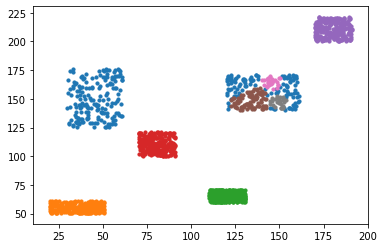

In [122]:
# Your code
from sklearn.cluster import DBSCAN
      
def fun_DBSCAN(x,eps,min_samples):
    dbscan = DBSCAN(eps, min_samples).fit(x)
    clusters = dbscan.labels_
    cluster_indexs = np.unique(clusters).tolist()
#     print(cluster_indexs)/
    
    print("DBSCAN: eps={} , min_samples={}".format(eps,min_samples))
    fig, plots = plt.subplots()
    for cluster_index in cluster_indexs :
        sub_set = np.array([x[i] for i in range(len(x)) if clusters[i] == cluster_index])
        if len(sub_set) == 0 :
            continue
        plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, cmap='viridis')
    plt.show()
    
choice = [[4,20],[5,10],[5,20]]
for [eps,min_samples] in choice:
    fun_DBSCAN(x,eps,min_samples)

(d) Compare k_means and DBSCAN results. Which of these methods is more suitable for clustering this data? Why?

K-Means: The number of clusters is 6


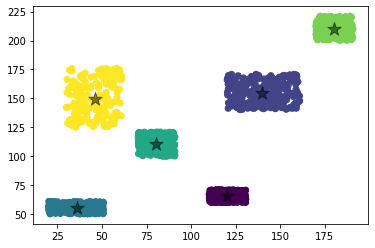

DBSCAN: eps=4 , min_samples=20


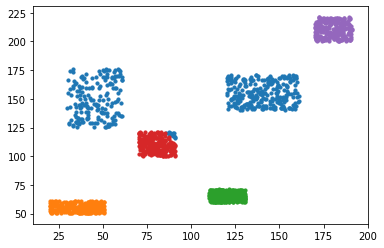

In [123]:
# Your code
fun_KMeans(x,cluster_num=6)
fun_DBSCAN(x,eps=4,min_samples=20)

Explanation:<br>
K-Means is more suitable for clustering this data, because we can intuitively distinguish that this data can be divided into 6 categories and each shape of clustering is rectangular.

(e) Add noise to the two mentioned columns. For adding noise, first find the range of these two columns and add a random number of 30 samples of noise in the range of each column to that. Plot the scatter diagram again.
Repeat k_means and DBSCAN algorithms for clustering. Which of these methods is more suitable for clustering this data? Why?

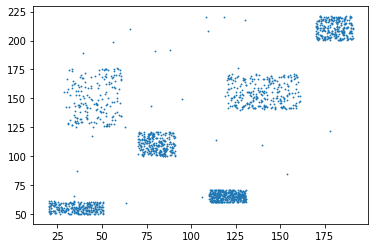

K-Means: The number of clusters is 6


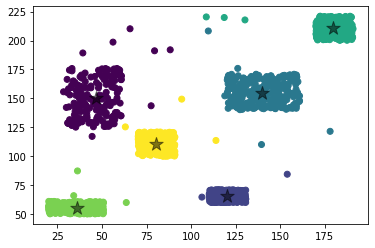

DBSCAN: eps=6 , min_samples=6


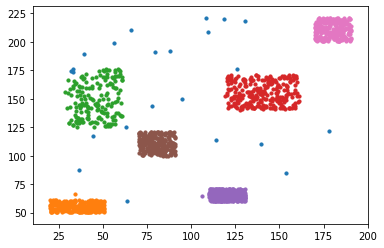

In [146]:
# Your code
def add_noise(x):
    min_0 = np.min(x[:,0])
    max_0 = np.max(x[:,0])
    min_1 = np.min(x[:,1])
    max_1 = np.max(x[:,1])

    noise = np.zeros((30,2,))

    for i in range(noise.shape[0]):
        rand_0 = min_0 + (max_0-min_0)*np.random.random()
        rand_1 = min_1 + (max_1-min_1)*np.random.random()
        noise[i,0] = rand_0
        noise[i,1] = rand_1
    x_noise = np.vstack((x,noise))
    return x_noise

x_noise = add_noise(x)
plt.scatter(x_noise[:,0],x_noise[:,1], s=0.7)
plt.show()

fun_KMeans(x_noise,cluster_num=6)
fun_DBSCAN(x_noise,eps=6,min_samples=6)

Explanation:<br>
DBSCAN is more suitable for clustering this data, because it can good distinguish noise to a cluster and other real data are also good clustered.

## Question 4 - Frequent itemsets and association rules (15 points): 

(a) You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'applications' dataset by random sampling. Use one of the group member's student number as a seed.
 - After completing this preprocessing step, export your final dataset as 'applications_2.csv' dataset and use that for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [173]:
# Your code
data_app = pd.read_csv("applications.csv", delimiter=',')
df_app = pd.DataFrame(data_app).sample(frac=0.9, random_state=391180)
# df_app.to_csv("applications_2.csv", index=False)

/Users/hhk/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(b) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm (Hint: When you are creating rows to make the data_set, you should use none_empty strings).

In [174]:
# Your code

# Import Apriori module and TransactionEncoder module and association module from mlxtend
import csv
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

# Read file 'applications_2.csv' and change the data format for Apriori algorithm
data_set = []
with open("applications_2.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        data_set.append(row)
        
# Using TransactionEncoder module to convert an array to DataFrame for Apriori algorithm in mlxtend
te = TransactionEncoder()
te_ary = te.fit(data_set).transform(data_set)
data = pd.DataFrame(te_ary, columns = te.columns_)
# data.tail(5)

frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


,support,itemsets,length
0,0.999830,(),1
1,0.585753,(A_DECLINED),1
2,1.000000,(A_PARTLYSUBMITTED),1
3,0.558584,(A_PREACCEPTED),1
4,1.000000,(A_SUBMITTED),1
5,0.558584,(W_Completeren aanvraag),1
6,0.585753,"(, A_DECLINED)",2
7,0.999830,"(, A_PARTLYSUBMITTED)",2
8,0.558414,"(, A_PREACCEPTED)",2
9,0.999830,"(, A_SUBMITTED)",2


(c) Find the most frequent itemsets with the support of more than 0.4 by using the Apriori algorithm having more than 2 members.

In [175]:
# Your code

frequent_itemsets_max_2 = apriori(data, min_support = 0.4, max_len = 2, use_colnames = True)

frequent_itemsets_min_2 = frequent_itemsets[~ frequent_itemsets['itemsets'].isin(frequent_itemsets_max_2['itemsets'])]
frequent_itemsets_min_2


,support,itemsets,length
19,0.585753,"(, A_DECLINED, A_PARTLYSUBMITTED)",3
20,0.585753,"(, A_DECLINED, A_SUBMITTED)",3
21,0.558414,"(, A_PARTLYSUBMITTED, A_PREACCEPTED)",3
22,0.999830,"(, A_PARTLYSUBMITTED, A_SUBMITTED)",3
23,0.558414,"(, W_Completeren aanvraag, A_PARTLYSUBMITTED)",3
24,0.558414,"(, A_SUBMITTED, A_PREACCEPTED)",3
25,0.558414,"(, W_Completeren aanvraag, A_PREACCEPTED)",3
26,0.558414,"(, W_Completeren aanvraag, A_SUBMITTED)",3
27,0.585753,"(A_SUBMITTED, A_DECLINED, A_PARTLYSUBMITTED)",3
28,0.558584,"(A_SUBMITTED, A_PARTLYSUBMITTED, A_PREACCEPTED)",3


(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence and lift of filtered rules in one table.

In [176]:
# Your code

rules_association =arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.3)

filtered_rules = rules_association.loc[(rules_association['lift'] > 1.2)]

filtered_rules[['support', 'confidence', 'lift']]

,support,confidence,lift
22,0.558584,1.000000,1.790242
23,0.558584,1.000000,1.790242
62,0.558414,1.000000,1.790242
63,0.558414,1.000000,1.790242
66,0.558414,0.999696,1.790242
67,0.558414,0.999696,1.790242
86,0.558584,1.000000,1.790242
88,0.558584,1.000000,1.790242
89,0.558584,1.000000,1.790242
91,0.558584,1.000000,1.790242


## Question 5 - Text Mining (15 points)

Among the datasets given for this assignment you will find the files "pg_train" and "pg_test". These two files contain a labeled corpus, already splitted in training and test set.
The corpus consists of sentences from several novels, labeled with the name of the author. The first task is text classification: you will train a set of classifiers that predict the author of a piece of text.

(a) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier with the author as target.

In [20]:
# Your code

(b) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier with the author as target.


In [21]:
# Your code

(c) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [22]:
# Your code

(d) Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier with the author as target.


In [23]:
# Your code

(e) Predict the classification with the four models on the test data.

In [24]:
# Your code

(f) Obtain confusion matrices for the four different models.


In [25]:
# Your code

(g) Obtain accuracy and f1-score for the four different models.


In [26]:
# Your code

(h) Briefly comment on the quality of the predictions for the four models.

Explanation:


(i) For the two authors Austen and Chesterton separately, build a bigram language model. You should use both training and test data to build the model. Do not perform stemming or stopword removal for this task, but do use the other preprocessing steps described in (a). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [27]:
# Your code

(j) For each author, use the correspondent language models from (i) to generate, using MLE, a sentence of fifteen words starting from each of the following terms:

In [28]:
'She'
'They'
'It'

'It'

(k) Now, computer another two models (for Austen and Chesterton separately), build a trigram model with the same data as in (i). Use both right and left padding, and manage unknown terms by using a dedicated token.

In [29]:
# Your code

(l) For each author, use the correspondent language models from (k) to generate, using MLE, a sentence of fifteen words starting from each of the same terms as question (j):

In [30]:
# Your code

(m) Comment on the quality of the models and generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation:


## Question 6 - Process Mining (15 points)
For this part, refer to the online docs of pm4py (https://pm4py.fit.fraunhofer.de/).
Important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade`.
In this section of the assignment you will be working with a real life event log, derived from the activity of the help desk department of an Italian software company. The data is contained in the file "event_log.xes".

(a) Use the provided event log and identify the least frequent variant and the most frequent variant.


In [31]:
# Your code

(b) Remove all the variants that contain less than 1% of the traces in the log. Create a new event log without these variants.

In [32]:
# Your code

(c) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without the infrequent variants of question (b)).


In [33]:
# Your code

(d) Perform the token replay conformance checking using your discovered model (c) and the original event log. Does your process model fit the log?


In [34]:
# Your code

Explanation:


(e) Calculate the fitness of the model in (c).

In [35]:
# Your code

(f) Are there any deviations between the process model and the event log? If so, where and why?

Explanation:


(g) Now use the original event log and remove the two most frequent variants, and discover the model based on your new event log (the filtered log without two most frequent variants).


In [36]:
# Your code

(h) Perform the token replay conformance checking using the newly discovered model of question (g) and the original event log. Does your process model fit the log?

In [37]:
# Your code

Explanation:


(i) Calculate the fitness of the model in (g).

In [38]:
# Your code

(j) Are there any deviations in the process model? If so, where and why?

Explanation:

(k) Use the complete event log (original event log) and discover your process model using Inductive Miner.


In [39]:
# Your code

(l) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit the log?

In [40]:
# Your code

Explanation:

(m) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Explanation:


(n) Visualize the model discovered in question (k) enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

In [41]:
# Your code

(o) If you were the process owner and you had more resources to hire employees, on which parts of the process would you assign them to maximize efficiency?

Explanation:


(p) Add your further comments and considerations on the frequency and performance informations. Does the process have a "happy path", and is it shown in the enhanced process models? Where are the major bottlenecks in this process? Is there any rework?

Explanation:
